In [56]:
import numpy as nm
import pandas as pd
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [57]:
spam_df = pd.read_csv('SMSSpamCollection', sep = '\t' , names = {'target' , 'message'})
spam_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
spam_df.columns

Index(['target', 'message'], dtype='object')

In [59]:
spam_df = spam_df.loc[:, ['target' , 'message']]

### EDA

In [60]:
spam_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
a = spam_df.shape[0]
print("Number of rows :",a)
print("Number of columns : ",spam_df.shape[1])

Number of rows : 5572
Number of columns :  2


In [62]:
spam_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

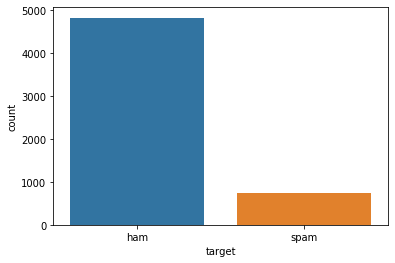

In [63]:
sbn.countplot(x = 'target' , data = spam_df)

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [64]:
df = spam_df.loc[spam_df['target'] == 'ham' , :]
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [65]:
df['target'].value_counts()

ham    4825
Name: target, dtype: int64

In [66]:
word = ' '.join(df['message'])
print(word)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [67]:
df = spam_df.loc[spam_df['target'] == 'ham' ,:]
words = ' '.join(df['message'])
cleaned_word = ' '.join( [word for word in words.split()
                             if "I'm" not in word
                               and word != 'it'
                         ])

In [108]:
wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'black',width = 1600 , height = 800).generate(cleaned_word)

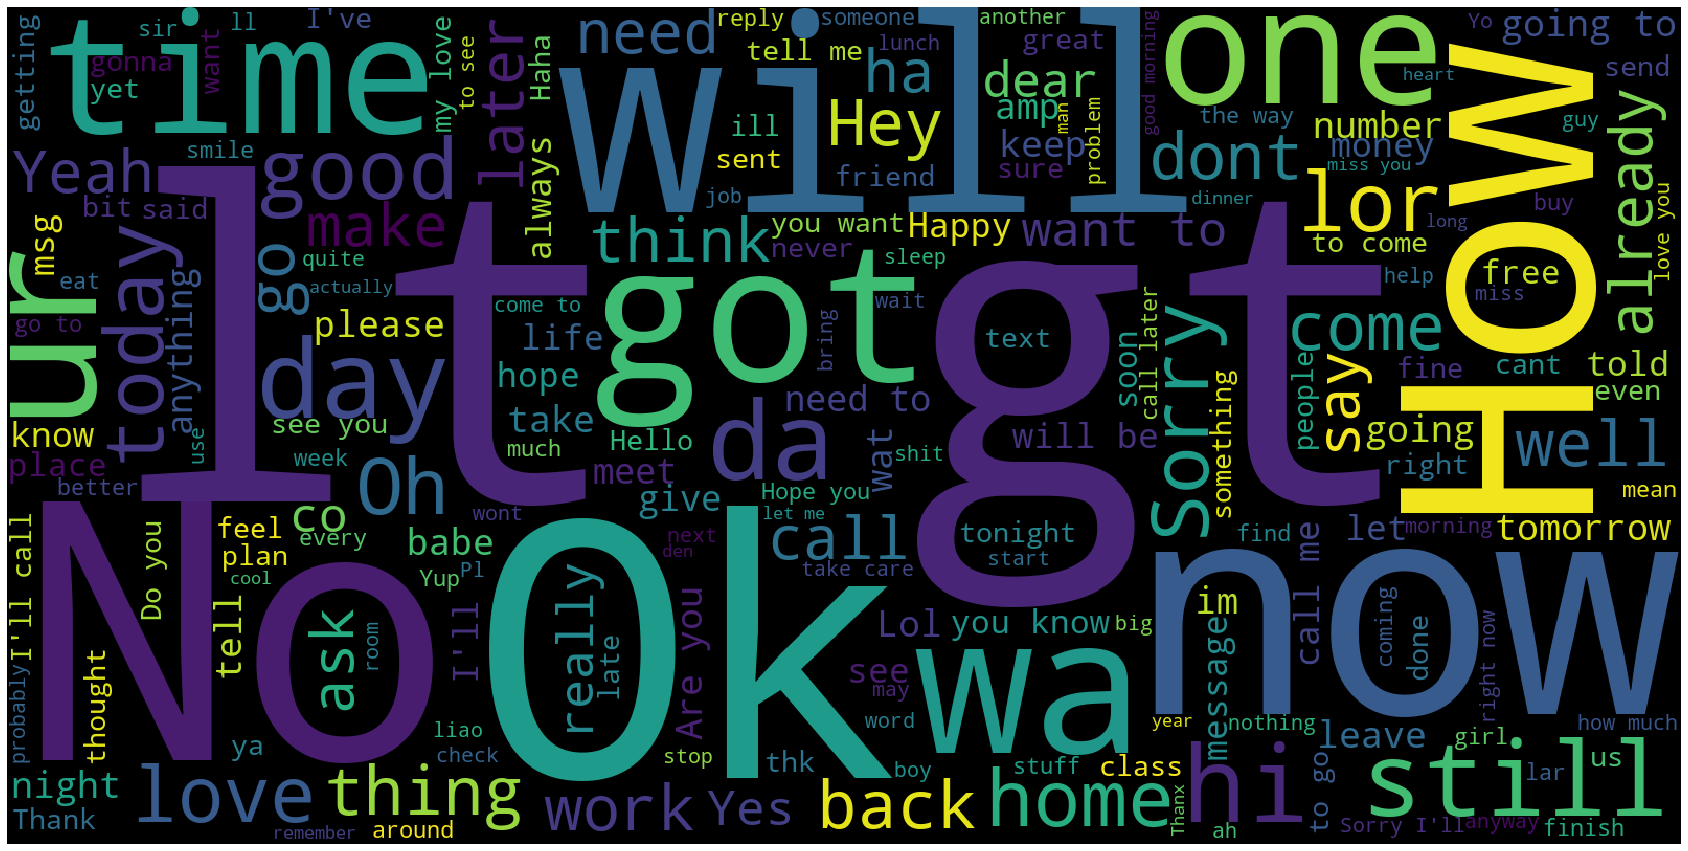

In [109]:
plt.figure(1, figsize = (30 ,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [68]:
df = spam_df.loc[spam_df['target'] == 'spam' ,:]
df.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [69]:
df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [70]:
words = ' '.join(df['message'])
print(word)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [71]:
df = spam_df.loc[spam_df['target'] == 'spam' ,:]
words = ' '.join(df['message'])
cleaned_word = ' '.join( [word for word in words.split()
                             if "http" not in word      
                         ])

In [114]:
wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'red',width = 1600 , height = 800).generate(cleaned_word)

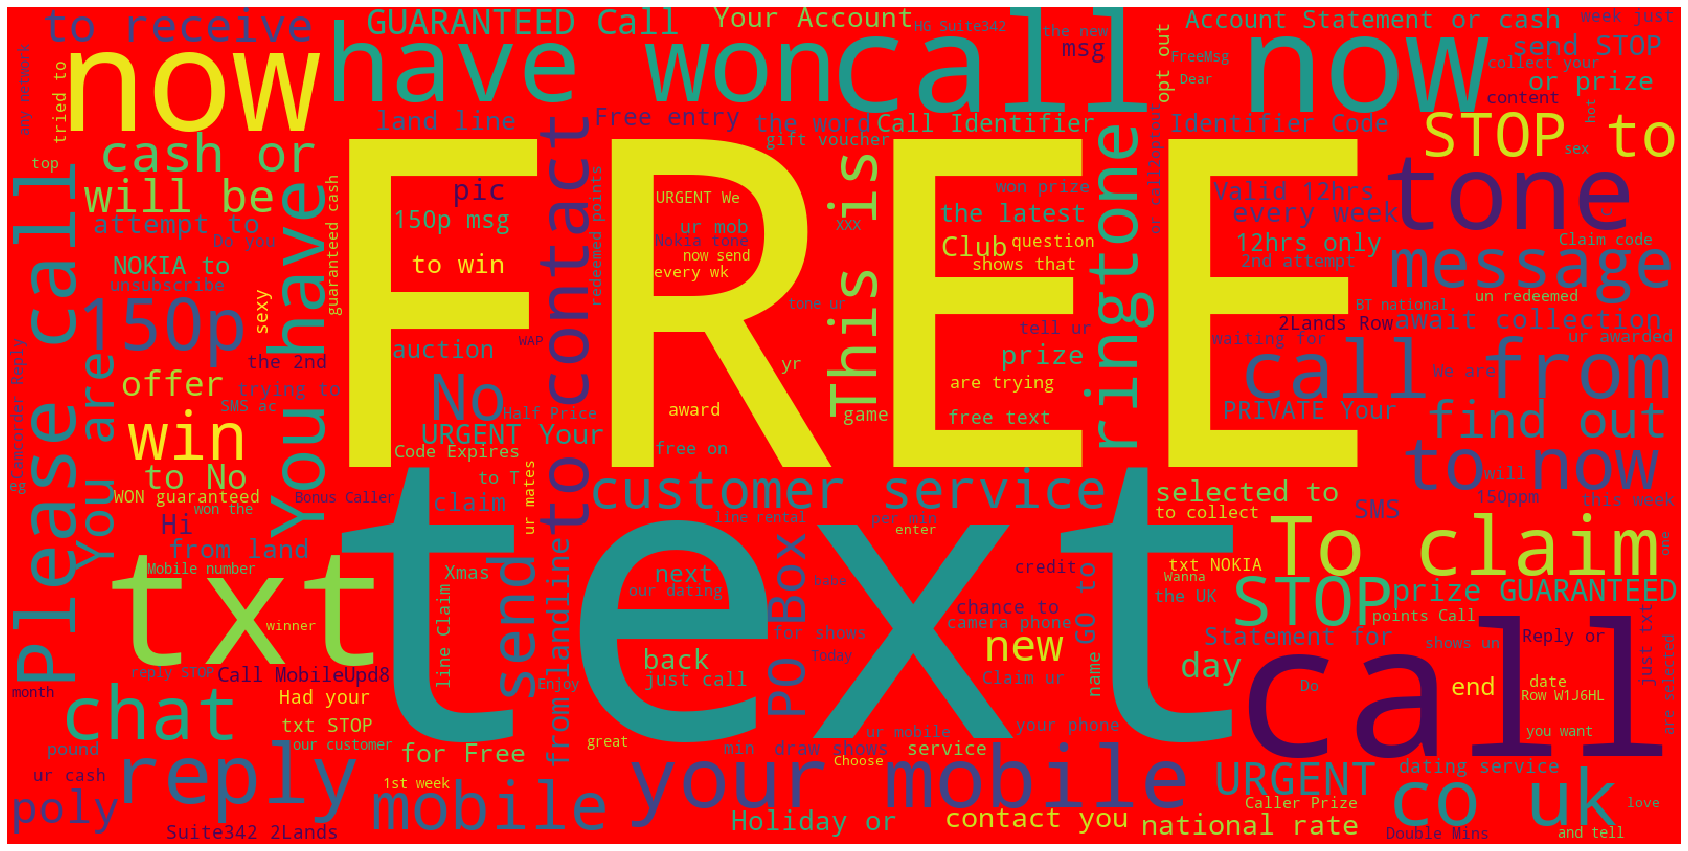

In [21]:
plt.figure(1, figsize = (30 ,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [72]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [73]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [74]:
clean_target_lst = []
target_len_lst = []

In [75]:
def preprocess(raw_target , flag):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_target)
    letters_only = letters_only.lower()
    words = letters_only.split()
    words = [w for w in words if not w in stopwords.words("english")]
    if (flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
        
    clean_target_lst.append(" ".join(words))
    target_len_lst.append(len(words))

In [77]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [78]:
clean_target_lst = []

target_len_lst = []

spam_df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

spam_df['clean_target_stem'] = clean_target_lst

spam_df['target_len_stem'] = target_len_lst

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [01:18<00:00, 70.69it/s]


In [79]:
clean_target_lst = []

target_len_lst = []

spam_df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

spam_df['clean_target_lemma'] = clean_target_lst

spam_df['target_len_lemma'] = target_len_lst

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [01:17<00:00, 71.94it/s]


In [80]:
spam_df.head()

,target,message,clean_target_stem,target_len_stem,clean_target_lemma,target_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [81]:
spam_df['ham'] = spam_df['target'].apply(lambda x : 0 if x == 'ham' else 1)
spam_df.head()

,target,message,clean_target_stem,target_len_stem,clean_target_lemma,target_len_lemma,ham
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0


In [83]:
spam_df['spam']=spam_df['target'].apply(lambda x:0 if x=='spam' else 1)
spam_df.head()

,target,message,clean_target_stem,target_len_stem,clean_target_lemma,target_len_lemma,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0,1


In [87]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(spam_df,test_size=0.2,random_state=42)

In [88]:
train_clean_target=[]
for target in train['clean_target_stem']:
    train_clean_target.append(target)

test_clean_target=[]
for target in test['clean_target_stem']:
    test_clean_target.append(target)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_target)

test_features = vectorizer.transform(test_clean_target)

In [90]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [91]:
print('Total unique words :', len(vectorizer.vocabulary_))
print('Type of train features :', type(train_features))
print('Shape of input data :', train_features.shape)

Total unique words : 5593
Type of train features : <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data : (4457, 5593)


### Modle Building and Evatuation

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [93]:
Classifiers = [  LogisticRegression() , DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 200)]

In [94]:
train.head()

,message,clean_target_stem,target_len_stem,clean_target_lemma,target_len_lemma,ham,spam
1978,Reply to win £100 weekly! Where will the 2006 ...,repli win weekli fifa world cup held send stop...,11,reply win weekly fifa world cup held send stop...,11,1,0
3989,Hello. Sort of out in town already. That . So ...,hello sort town alreadi dont rush home eat nac...,12,hello sort town already dont rush home eating ...,12,0,1
3935,How come guoyang go n tell her? Then u told her?,come guoyang go n tell u told,7,come guoyang go n tell u told,7,0,1
4078,Hey sathya till now we dint meet not even a si...,hey sathya till dint meet even singl time saw ...,11,hey sathya till dint meet even single time saw...,11,0,1
4086,Orange brings you ringtones from all time Char...,orang bring rington time chart hero free hit w...,18,orange brings ringtones time chart hero free h...,18,1,0


In [106]:
dense_features=train_features.toarray()
dense_test=test_features.toarray()
for classifier in tqdm(Classifiers):
    fit=classifier.fit(dense_features,train['spam'])
    pred=fit.predict(dense_test)
    accuracy=accuracy_score(pred,test['spam'])
    print('accuracy of'+classifier.__class__.__name__+'is'+str(accuracy))
    
    con_matrix = metrics.confusion_matrix(pred,test['spam'])
    print('Confusion Matrix of '+classifier.__class__.__name__+' is '+str(con_matrix))
    class_report = metrics.classification_report(pred,test['spam'])
    print('Classification Matrix of '+classifier.__class__.__name__+' is '+str(class_report))

 33%|████████████████████████████                                                        | 1/3 [00:02<00:04,  2.15s/it]

accuracy ofLogisticRegressionis0.9838565022421525
Confusion Matrix of LogisticRegression is [[132   1]
 [ 17 965]]
Classification Matrix of LogisticRegression is               precision    recall  f1-score   support

           0       0.89      0.99      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:29<00:09,  9.68s/it]

accuracy ofDecisionTreeClassifieris0.9748878923766816
Confusion Matrix of DecisionTreeClassifier is [[130   9]
 [ 19 957]]
Classification Matrix of DecisionTreeClassifier is               precision    recall  f1-score   support

           0       0.87      0.94      0.90       139
           1       0.99      0.98      0.99       976

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.98      0.97      0.98      1115



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:02<00:00, 40.73s/it]

accuracy ofRandomForestClassifieris0.9775784753363229
Confusion Matrix of RandomForestClassifier is [[124   0]
 [ 25 966]]
Classification Matrix of RandomForestClassifier is               precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       1.00      0.97      0.99       991

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [96]:
model=LogisticRegression()
model.fit(dense_features,train['spam'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)